In [1]:
from functools import reduce
from operator import mul
import random

from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
plt.rc('figure', figsize=(15, 5))

# Task 1
## Series
### $\sum_{n=0}^{\infty}\frac{60}{n^2 + 6n + 8}$
### Analytical sum

In [3]:
SUM = 25
SUM

25

### Partial sums and errors
### $S_N = \sum_{n=0}^{N}\frac{60}{n^2 + 6n + 8}$

In [4]:
series = DataFrame(index=[10**n for n in range(1, 6)], 
                   columns=['Sum', 'Absolute error', 'Relative error'])
series.index.name = "N"
for n in series.index:
    series.loc[n, 'Sum'] = sum([60 / (a**2 + 6*a + 8) for a in range(n)])
    series.loc[n, 'Absolute error'] = abs(SUM - series.loc[n, 'Sum'])
    series.loc[n, 'Relative error'] = series.loc[n, 'Absolute error'] / SUM
    
series

,Sum,Absolute error,Relative error
N,,,
10,20.1923,4.80769,0.192308
100,24.4146,0.58538,0.0234152
1000,24.9401,0.0598504,0.00239402
10000,24.994,0.0059985,0.00023994
100000,24.9994,0.000599985,2.39994e-05


### Chart

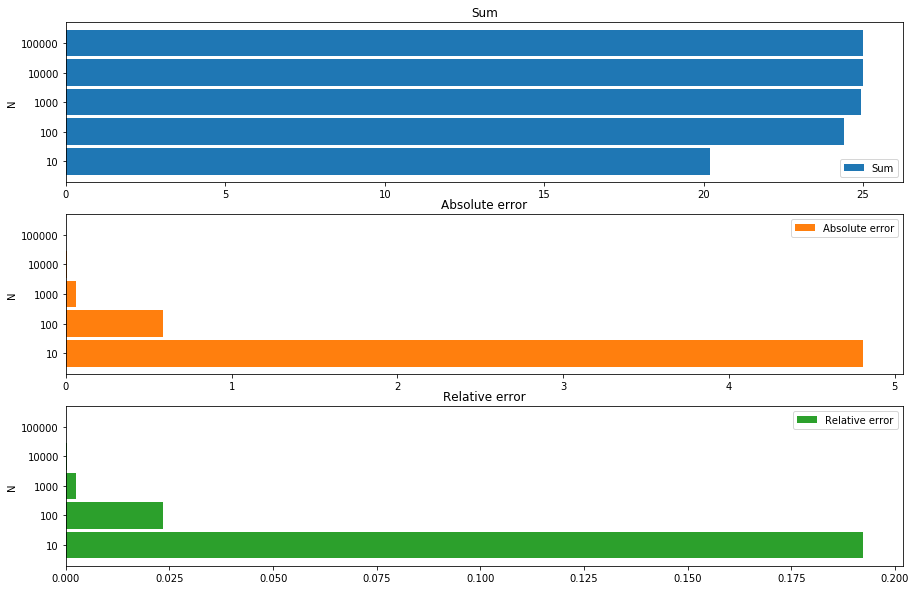

In [5]:
params = {
    'kind': 'barh',
    'subplots': True, 
    'sharex': False,
    'figsize': (15, 10),
    'width': 0.9,
    }

series.plot(**params)
plt.show()

# Task 2
## Function
### $\mathrm{arsh} x = \ln2x + \sum_{k=1}^{\infty}(-1)^{k - 1}\frac{(2k-1)!!}{(2k)!!}\cdot\frac{1}{2kx^{2k}};|x| > 1$

In [6]:
def double_fact(n):
    """Return the double factorial"""
    return reduce(mul, range(1 if n%2 else 2, n+1, 2))

def arsh(x, tol=1e-3, maxiter=100):
    """Return an arsh(x) by using its infinite series"""
    result = np.log(2 * x)
    for i in range(1, maxiter):
        element = (-1)**(i - 1) \
                  * double_fact(2*i - 1) \
                  / double_fact(2*i) \
                  / (2 * i * x**(2 * i))
        result += element
        if np.abs(element) <= tol:
            return i, result
    return maxiter, result  

In [8]:
x = 2
tol = 1e-6
terms, approximate = arsh(x, tol)
accurate = np.arcsinh(2)
abs_error = abs(accurate - approximate)
rel_error = abs_error / accurate

print(f"arsh({x}) = {accurate}")
print(f"Approximate value: {approximate}")
print(f"Accuracy: {tol}")
print(f"Number of terms: {terms}")
print(f"Absolute error: {abs_error}")
print(f"Relative error: {rel_error}")

arsh(2) = 1.4436354751788103
Approximate value: 1.44363563006236
Accuracy: 1e-06
Number of terms: 7
Absolute error: 1.548835497633405e-07
Relative error: 1.0728715969255082e-07


# Task 3
## Matrix $5\times5$
### $a_{ij} = \frac{321}{(1 + c)^6}$
### $c = c_{ij} = 2.5\cdot i\cdot j$

In [9]:
matrix = []
n = 5

for i in range(1, n + 1):
    matrix.append([])
    for j in range(1, n + 1):
        c = 2.5 * i * j
        a = 321 / (1+c)**6
        matrix[i - 1].append(a)
matrix = np.array(matrix)
matrix

array([[  1.74621119e-01,   6.88014403e-03,   8.51121337e-04,
          1.81196132e-04,   5.30276549e-05],
       [  6.88014403e-03,   1.81196132e-04,   1.91330910e-05,
          3.74273660e-06,   1.03911818e-06],
       [  8.51121337e-04,   1.91330910e-05,   1.90589012e-06,
          3.61688641e-07,   9.85690692e-08],
       [  1.81196132e-04,   3.74273660e-06,   3.61688641e-07,
          6.75774643e-08,   1.82424841e-08],
       [  5.30276549e-05,   1.03911818e-06,   9.85690692e-08,
          1.82424841e-08,   4.89623981e-09]])

### Determinant

In [10]:
det = np.linalg.det(matrix)
det

1.6701687148549123e-36

### Rank

In [11]:
np.linalg.matrix_rank(matrix)

5

### Inverse matrix

In [13]:
np.linalg.inv(matrix)

array([[  6.59684986e+01,  -8.04344329e+04,   3.86742973e+06,
         -3.12981665e+07,   5.51096541e+07],
       [ -8.04344329e+04,   8.56963620e+07,  -3.88251312e+09,
          3.03840572e+10,  -5.23602567e+10],
       [  3.86742973e+06,  -3.88251312e+09,   1.72067480e+11,
         -1.33137724e+12,   2.27856609e+12],
       [ -3.12981665e+07,   3.03840572e+10,  -1.33137724e+12,
          1.02434885e+13,  -1.74719828e+13],
       [  5.51096541e+07,  -5.23602567e+10,   2.27856609e+12,
         -1.74719828e+13,   2.97418823e+13]])

## Making 5% of errors in diagonal elements

In [14]:
random.seed(4354867)

matrix_err = matrix.copy()
for i in range(n):
    matrix_err[i, i] += random.choice([-1, 1]) \
                        * 0.05 \
                        * matrix_err[i, i]
matrix_err

array([[  1.83352175e-01,   6.88014403e-03,   8.51121337e-04,
          1.81196132e-04,   5.30276549e-05],
       [  6.88014403e-03,   1.72136325e-04,   1.91330910e-05,
          3.74273660e-06,   1.03911818e-06],
       [  8.51121337e-04,   1.91330910e-05,   2.00118463e-06,
          3.61688641e-07,   9.85690692e-08],
       [  1.81196132e-04,   3.74273660e-06,   3.61688641e-07,
          7.09563376e-08,   1.82424841e-08],
       [  5.30276549e-05,   1.03911818e-06,   9.85690692e-08,
          1.82424841e-08,   4.65142782e-09]])

### Determinant

In [15]:
det_err = np.linalg.det(matrix_err)
det_err

2.3716097316155841e-31

### Rank

In [16]:
np.linalg.matrix_rank(matrix_err)

5

### Inverse matrix

In [17]:
np.linalg.inv(matrix_err)

array([[  1.71992703e+01,   2.28453086e+03,  -4.17781981e+04,
         -3.06296749e+05,   1.38016054e+06],
       [  2.28453086e+03,  -3.44182172e+05,   1.95157370e+06,
          8.03258734e+06,  -2.20139955e+07],
       [ -4.17781981e+04,   1.95157370e+06,   1.56443391e+07,
          1.35946916e+08,  -8.24386271e+08],
       [ -3.06296749e+05,   8.03258734e+06,   1.35946916e+08,
          1.94432244e+09,  -8.80891694e+09],
       [  1.38016054e+06,  -2.20139955e+07,  -8.24386271e+08,
         -8.80891694e+09,   4.14160959e+10]])

## Errors

In [18]:
abs_det_err = abs(det - det_err)
rel_det_err = abs_det_err / det
print(f"Absolute error of the determinant: {abs_det_err}")
print(f"Relative error of the determinant: {rel_det_err}")

Absolute error of the determinant: 2.3715930299284357e-31
Relative error of the determinant: 141997.21314588605
